# Lecture 8: The shooting method for BVP's

**Overview:**
* Root finding and boundary value problems.

**Next Lecture:**
* Shoot and Matching, 1D Schrodinger eqn.

---

### Tasks
- How does the solution for the launch angle depend on the initial bracketing window for your search?
- Can you extend this code to handle the case with air resistance? 
- Does the addition of air resistance result in new complications for the root finder?

In [1]:
#%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from numpy import pi
import Particle3D as pt

In [2]:
def bisect(f, bracket, target, v, Cd, tol = 1.e-6):
    """ find the root of a function f using bisection
    a and b are low and high bracket limits
    v is a velocity
    Cd is a drag coefficent """
    a = bracket[0]
    b = bracket[1]
    
    fa = f(a,target, v, Cd)
    fb = f(b,target, v, Cd)
    gap  = abs(a - b)
   
    if fa == None :
        return 
    if fb == None :
        return
    
    if (fa*fb > 0.0):
        print('Bisection error: no root bracketed')
        return None
    elif fa == 0.0: return a
    elif fb == 0.0: return b

    while(True):
        xmid = 0.5*(a+b)
        fmid = f(xmid, target, v, Cd)

        if (fa*fmid > 0.0):
            a, fa = xmid, fmid
        else:
            b = xmid

        if (fmid == 0.0 or abs (b-a) < tol*gap): break

    return xmid

# the root of ft give the total time to reach target
def ft(t,target, V,Cd):
    # when air resistance is included you must define another function 
    # to find tfo
    
    p = pt.Projectile(tf = t, x0 = 0.0, y0 = 0.0, z0 = 0.0, u0 = V[0], v0 = V[1], w0 = V[2], Cd = Cd) 
    p.scipy_trajectory()
    
    return p.xv[-1,1] - target[1]

def findtf(bracket, target, v, Cd):
    return bisect(ft, bracket, target, v, Cd)

# the root of fy is our solution
def fy(theta, target, v0, Cd):
    # only working in two dimensions (y,z) for now,.
    V = np.array([0, v0*np.cos(theta), v0*np.sin(theta)])
    
    # if there is no drag, tf is easy to calculate analytically
    # with drag we must integrate and use a root finder to locate tf
    bracket = [0.1, 10]
    tf = findtf(bracket, target, V, Cd)

    # check if we can make the range
    if tf == None:
        print('Initial velocity will not cover range')
        return 
    
    nsteps = 100
    dt = tf/nsteps
    p = pt.Projectile(tf = tf, z0 = 0, u0 = V[0], v0 = V[1], w0 = V[2], dt = dt, Cd = Cd) 
    p.scipy_trajectory()
    
    print("z(tf) = ", p.xv[-1,2])
    return p.xv[-1,2] - target[2] 
    

* Change parameters and find launch angle below

z(tf) =  0.0
z(tf) =  9.94757772836087
z(tf) =  4.303966841988046
z(tf) =  7.635940583449125
z(tf) =  6.048163670687032
z(tf) =  5.192235011968306
z(tf) =  5.624593932978817
z(tf) =  5.837547634167907
z(tf) =  5.943162888566841
z(tf) =  5.995716656256373
z(tf) =  6.022037053098969
z(tf) =  6.0088772042645235
z(tf) =  6.00229701726155
z(tf) =  5.999054552731134
z(tf) =  6.000675791218564
z(tf) =  5.999912868148602
z(tf) =  6.000246635049928
z(tf) =  6.00007975199904
z(tf) =  5.999948615258093
z(tf) =  6.000014183642677
z(tf) =  5.999981399453922
z(tf) =  5.999997791549169
theta =  18.018984875089902


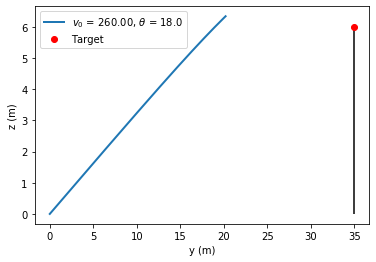

In [6]:
v0 = 260 #initial launch speed
yb = 35 # y coordinate of target
zb = 6 # z coordinate of target
Cd = 0.10 # drag coefficient, you must edit ft and fy above to work for non-zero Cd

theta_bracket = [0.01,0.5] # in radians

# find the launch angle
# it would be more efficient to first check if we bracket the root before trying a full
# bisection search
theta = None
while not theta:
    theta = bisect(fy, theta_bracket, [0, yb, zb], v0, Cd)
    
    if not theta:
        print("Increasing launch speed by 1 %\n")
        v0=v0*1.01

# only make a plot if we can hit our target
if (theta != None):
    print("theta = ", theta*180/pi)
    # max time for plotting purposes
    t_max = yb/(v0*np.cos(theta))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # plot the trajectory
    V = [0, v0*np.cos(theta), v0*np.sin(theta)]
    p = pt.Projectile(tf = t_max*2, z0 = 0, u0 = V[0], v0 = V[1], w0 = V[2], dt = 0.001, Cd = Cd) 
    #p = pt.Projectile(tf = t_max*2,  z0 = 0, u0 = V[0], v0 = V[1], w0 = V[2], dt = 0.001, Cd = Cd) 
    p.scipy_trajectory()
    ax.plot(p.xv[:,1], p.xv[:,2], lw = 2, label = '$v_0$ = {:.2f}, $\\theta$ = {:.1f}'.format(v0,theta*180/np.pi))

    # plot the target position
    ax.vlines(yb, 0 , zb)
    ax.plot(yb, zb, marker ='o', ls = 'None', color = 'r', label = 'Target')
    
    
    ax.set_xlabel('y (m)')
    ax.set_ylabel('z (m)')
    ax.legend()
    plt.show()

In [96]:
v0 = 10 * 26 #initial launch speed
yb = 35 # y coordinate of target
zb = 6 # z coordinate of target
Cd = 0.1 # drag coefficient, you must edit ft and fy above to work for non-zero Cd

t1, t2 = .01, 10
target = [0,yb,zb]
theta = .05
#V = np.array([0, v0*np.cos(theta), v0*np.sin(theta)])

#ft(t1,target, V,Cd), ft(t2,target, V,Cd)

#findtf([.01,10], target, V, Cd)

fy(theta, target, v0, Cd)

z(tf) =  -2.2606562191046056


-8.260656219104606

particle init'd
